# Assignment 05 - Leonardo Paiva

Step 1: Make a new Jupyter notebook

Step 2: Get a CORGIS dataset

Chose another dataset from CORGIS here (Links to an external site.) and download the CSV file

https://corgis-edu.github.io/corgis/csv/video_games/
https://corgis-edu.github.io/corgis/datasets/csv/video_games/video_games.csv


In [206]:
# Step 2: Look at descriptive statistics of this dataset

# Use pandas in your notebook to import this data into a dataframe

import pandas as pd
from scipy import stats
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('video_games.csv')

In [207]:
#Renaming columns name to make it easy for me manipulate the data
# 'Metrics.Review Score' = 'COL1
# Metrics.Used Price'='COL3
df = df.rename(columns={'Metrics.Review Score': 'COL1', 'Metrics.Used Price':'COL3'})

In [208]:
# Print descriptive statistics about the columns using the "describe" method
df.describe()

,Features.Max Players,COL1,Metrics.Sales,COL3,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,1212.000000,1212.000000,1212.00000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,1.658416,68.828383,0.50316,17.393894,2006.820132,13.653177,26.250426,11.225371,44.415842,9.396163,...,12.731491,18.866048,12.103548,13.995875,10.319788,8.465952,11.051966,8.280941,24.882838,6.974697
std,1.204377,12.956266,1.06985,5.018972,1.050653,19.397156,51.598941,13.493717,154.837893,11.176371,...,23.979610,42.917021,23.355374,57.333257,20.895117,9.691745,14.092617,9.502600,87.382770,7.964522
min,1.000000,19.000000,0.01000,4.950000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.000000,0.09000,14.950000,2006.000000,3.562500,4.000000,3.025000,1.000000,2.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,0.21000,17.950000,2007.000000,8.858333,12.000000,8.000000,6.000000,6.708333,...,7.291667,8.000000,7.000000,1.000000,6.283333,6.575000,8.000000,6.041667,3.000000,5.341667
75%,2.000000,79.000000,0.46000,17.950000,2008.000000,16.033333,27.600000,13.783333,25.000000,11.366667,...,16.112500,21.033333,15.000000,7.000000,12.941667,11.033333,14.508333,10.533333,14.000000,9.312500
max,8.000000,98.000000,14.66000,49.950000,2008.000000,279.733333,476.266667,126.000000,2300.000000,120.200000,...,291.000000,478.933333,291.000000,1100.000000,291.000000,72.383333,135.583333,70.000000,1100.000000,70.000000


In [209]:
# Choose a numerical column (which I'll call COL1) and calculate the mean, median, mode, and trimmed mean. 
# Don't use the "describe" method, but you can use other convenient pandas methods to do this if you want For the trimmed mean, you can choose what to trim, but comment on the amount you're choosing to trim.

print("Mean = ", df['COL1'].mean())
print("Median = ", df['COL1'].median())
print("Mode = ", df['COL1'].mode())
print("20 % Trimmed Mean = ", stats.trim_mean(df.COL1, 0.20))

Mean =  68.82838283828383
Median =  70.0
Mode =  0    72
dtype: int64
20 % Trimmed Mean =  69.9065934065934


<AxesSubplot:ylabel='Frequency'>

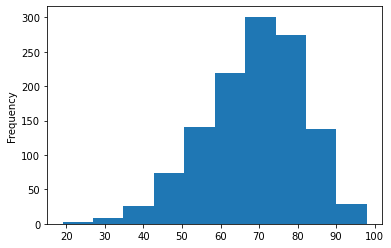

In [210]:
# Plot a histogram of COL1 data and comment on the relative locations of the mean, median, mode, and trimmed mean.
df['COL1'].plot.hist()


In [211]:
#Calculate the mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)
#Comment as well on how they compare to each other and to the histogram plot.

In [212]:
print("Standard Deviation = ", df['COL1'].std())
print("Qauntile = ", df['COL1'].quantile())
print("25% Qauntile = ", df['COL1'].quantile(0.25))
print("75% Qauntile = ", df['COL1'].quantile(0.75))

Standard Deviation =  12.956265876347192
Qauntile =  70.0
25% Qauntile =  60.0
75% Qauntile =  79.0


The 25% and 75% quantiles that match with features in the plot is in between the range of 60 and 80


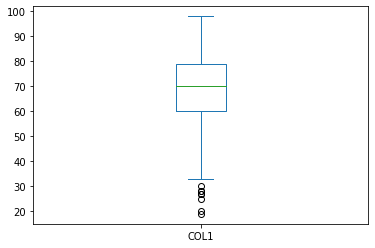

In [213]:
#plot a box plot of COL1
#Comment on how the locations of the calculated median and the 25% and 75% quantiles match with features in the plot
df['COL1'].plot(kind='box')
print("The 25% and 75% quantiles that match with features in the plot is in between the range of 60 and 80")

In [214]:
#Make a new column in your dataframe called "COL1_mean_split"
#The values in the "COL1_mean_split" column should be equal to either 0, 1, or 2.  For any given row:
#If the COL1 value < 0.5 * (COL1 mean), set the COL1_mean_split value to 0
#If the COL1 value >= 0.5 * (COL1 mean) and COL1 value < (COL1 mean), set the COL1_mean_split value to 1
#If the COL1 value >= (COL1 mean), set the COL1_mean_split value to 2




#### Hi Professor - I was not able to comlete this task

In [215]:
# Make a bar plot showing the count of the values of 0, 1, and 2 in the COL1_mean_split column


#### Hi Professor - I was not able to comlete this task because of the dependency of the previous task

In [216]:
#Make another box plot of the COL1 values grouped by COL1_mean_split values
#There should be three boxes in the plot, one for each group of rows corresponding to COL1_mean_split values of 0, 1, or 2


#### Hi Professor - I was not able to comlete this task because of the dependency of the previous task

In [217]:
#Choose another numerical column (COL3)
#Calculate the correlation between COL1 and COL3
#Make a scatter plot of COL1 vs COL3 and comment on whether the calculated correlation value makes sense.
#Make a hexagonal binning plot of COL1 vs COL3

np.corrcoef(df['COL1'], df['COL3'])


array([[1.        , 0.14430018],
       [0.14430018, 1.        ]])

In [218]:
print ("As we can see - There is no Correlation between COL1 and COL3, 0.14 means is close to 0 so we assume that there is no correlation")

As we can see - There is no Correlation between COL1 and COL3, 0.14 means is close to 0 so we assume that there is no correlation


<AxesSubplot:xlabel='COL1', ylabel='COL3'>

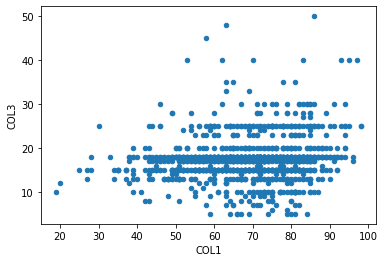

In [219]:
df.plot(kind='scatter',
        x='COL1',
        y='COL3')

<AxesSubplot:xlabel='COL1', ylabel='COL3'>

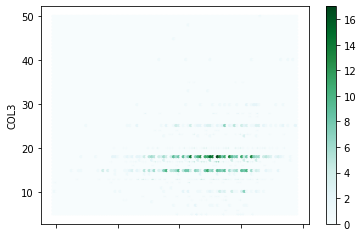

In [220]:
df.plot(kind='hexbin',
        x='COL1',
        y='COL3')

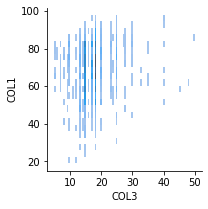

In [244]:
g = sns.FacetGrid(df)
g.map(sns.histplot, 'COL3', 'COL1')
plt.show()